# BoostDM-CH vs BoostDM-Cancer

Comparison of the predictions obtained from boostDM-CH and boostDM-cancer

## 1. Figure 3
## 2. Supplemental Figure S7

## Upload dependencies from scripts

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import glob
import pandas as pd
import sys

import matplotlib.pyplot as plt
from matplotlib import gridspec

sys.path.append("scripts/")
import conf as conf
import oncotree_notebook
tree = oncotree_notebook.Oncotree()

from fetch_data_needle import create_observed_dataset, create_observed_dataset_cancer, get_plot_data_joanen

from plot_needle import get_PFAMs_per_transcript, plot_gene_full_nucleotide_simple,\
plot_observed_distribution_figure_3_simple, get_positions_in_CDS, plot_codon_bands_joanen_simple,\
get_position, plot_gene_full_nucleotide_invert, load_saturation_cancer, load_saturation_CH,\
tracked_blueprint, plot_codon_bands

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
pd.options.display.max_columns = 60

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

In [4]:
# Get observed mutations from BoostDM-CH
def get_mutations():
    
    obs_mut = pd.read_csv('/workspace/projects/boostdm_ch/output/run_20230802_includeLowQuality/discovery/mutations.tsv', sep='\t')
    obs_mut.rename(columns={'mut': 'alt'}, inplace=True)
    obs_mut['chr'] = obs_mut['chr'].astype(str)
    obs_mut['pos'] = obs_mut['pos'].astype(int)
    return obs_mut

# Get observed mutations from BoostDM-cancer
def get_mutations_cancer():
    
    obs_mut = pd.read_csv('/workspace/datasets/boostdm_runs/boostdm-cancer-output-2023/output_20230710/discovery/mutations.tsv', sep='\t')
    obs_mut.rename(columns={'mut': 'alt'}, inplace=True)
    obs_mut['chr'] = obs_mut['chr'].astype(str)
    obs_mut['pos'] = obs_mut['pos'].astype(int)
    return obs_mut

In [5]:
obs_muts_cancer = get_mutations_cancer()
len(obs_muts_cancer)

3932381

In [6]:
set(obs_muts_cancer['COHORT'])

{'CBIOP_WGS_PRAD_EURUROL_2017',
 'CBIOP_WGS_STAD_ONCOSG_2018',
 'CBIOP_WXS_ACYC_MDA_2015',
 'CBIOP_WXS_ACYC_SANGER_2013',
 'CBIOP_WXS_ACY_2019',
 'CBIOP_WXS_ANGS_TREATED_2020',
 'CBIOP_WXS_ANGS_UNTREAT_2020',
 'CBIOP_WXS_BCC_UNIGE_2016_TREAT',
 'CBIOP_WXS_BCC_UNIGE_2016_UNTREAT',
 'CBIOP_WXS_BLCA_BGI',
 'CBIOP_WXS_BLCA_DFARBER_MSKCC_2014',
 'CBIOP_WXS_BLCA_UTUC_IGBMC_2021',
 'CBIOP_WXS_BLCA_VALLEN_2018',
 'CBIOP_WXS_BRCA_MBCP_MET_NOTREAT_2020',
 'CBIOP_WXS_BRCA_MBCP_MET_TREAT_2020',
 'CBIOP_WXS_BRCA_MBCP_PRY_NOTREAT_2020',
 'CBIOP_WXS_BRCA_MBCP_PRY_TREAT_2020',
 'CBIOP_WXS_CLL_BROAD_2013',
 'CBIOP_WXS_CLL_IUOPA_2015',
 'CBIOP_WXS_CM_VALLEN_2018',
 'CBIOP_WXS_CSCC_UCSF_2018',
 'CBIOP_WXS_DLBCL_DFCI_2018',
 'CBIOP_WXS_DLBC_BROAD_2012',
 'CBIOP_WXS_EGC_TMUCIH_2015',
 'CBIOP_WXS_ESCA_BROAD',
 'CBIOP_WXS_ESCA_EGC_TRAP_2020',
 'CBIOP_WXS_HCC_AMC_PRV',
 'CBIOP_WXS_HNSC_BROAD',
 'CBIOP_WXS_HNSC_VALLEN_2018',
 'CBIOP_WXS_LUAD_BROAD',
 'CBIOP_WXS_LUAD_ONCOSG_2020',
 'CBIOP_WXS_LUAD_VALLEN_2018',

In [7]:
obs_muts = get_mutations()
len(obs_muts)

438010

In [8]:
obs_muts[(obs_muts['gene']=='DNMT3A') & (obs_muts['impact']!='no-SNV')]['impact'].value_counts()

Missense            1893
Nonsense             431
Essential_Splice     326
Synonymous            23
Stop_loss              1
Name: impact, dtype: int64

In [9]:
prediction_paths = list(glob.glob(os.path.join(conf.output_boostdm, 
                                               'prediction', 
                                               '*.*.prediction.tsv.gz')))
prediction_paths

['../../Paper_data/BoostDM-CH/prediction/IDH2.CH.prediction.tsv.gz',
 '../../Paper_data/BoostDM-CH/prediction/SRA1.CH.prediction.tsv.gz',
 '../../Paper_data/BoostDM-CH/prediction/U2AF1.CH.prediction.tsv.gz',
 '../../Paper_data/BoostDM-CH/prediction/SRSF2.CH.prediction.tsv.gz',
 '../../Paper_data/BoostDM-CH/prediction/GNAS.CH.prediction.tsv.gz',
 '../../Paper_data/BoostDM-CH/prediction/TP53.CH.prediction.tsv.gz',
 '../../Paper_data/BoostDM-CH/prediction/PPM1D.CH.prediction.tsv.gz',
 '../../Paper_data/BoostDM-CH/prediction/CHEK2.CH.prediction.tsv.gz',
 '../../Paper_data/BoostDM-CH/prediction/ASXL1.CH.prediction.tsv.gz',
 '../../Paper_data/BoostDM-CH/prediction/JAK2.CH.prediction.tsv.gz',
 '../../Paper_data/BoostDM-CH/prediction/KRAS.CH.prediction.tsv.gz',
 '../../Paper_data/BoostDM-CH/prediction/MDM4.CH.prediction.tsv.gz',
 '../../Paper_data/BoostDM-CH/prediction/ZRSR2.CH.prediction.tsv.gz',
 '../../Paper_data/BoostDM-CH/prediction/SH2B3.CH.prediction.tsv.gz',
 '../../Paper_data/BoostDM-

In [15]:
prediction_paths_cancer = list(glob.glob(os.path.join(conf.output_boostdm_cancer, 
                                               'prediction', 
                                               '*.*.prediction.tsv.gz')))
prediction_paths_cancer

['../../Paper_data/BoostDM-cancer/prediction/DNMT3A.MYELOID.prediction.tsv.gz',
 '../../Paper_data/BoostDM-cancer/prediction/IDH2.MYELOID.prediction.tsv.gz',
 '../../Paper_data/BoostDM-cancer/prediction/TP53.MYELOID.prediction.tsv.gz']

# 1. Figure 3

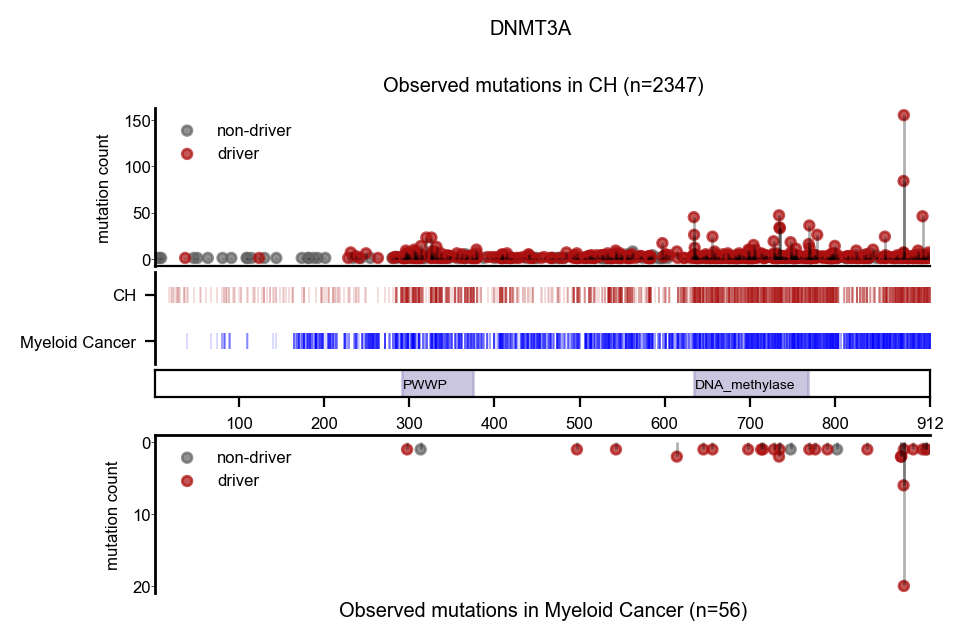

In [17]:
import matplotlib.patches as patches

fn_cancer = conf.output_boostdm_cancer+'prediction/DNMT3A.MYELOID.prediction.tsv.gz'
fn_ch = [x for x in prediction_paths if x.split('/')[-1].split('.')[0] == 'DNMT3A'][0]

CH_mat = pd.read_csv(fn_ch, sep="\t")
cancer_mat = pd.read_csv(fn_cancer, sep="\t")
gene, model = tuple(os.path.basename(fn_ch).split('.')[:2])
df_ch = create_observed_dataset(fn_ch, gene, model, obs_muts)
args_ch = get_plot_data_joanen(df_ch)
gene, cancer_type = tuple(os.path.basename(fn_cancer).split('.')[:2])
df_cancer = create_observed_dataset_cancer(fn_cancer, gene, cancer_type, obs_muts_cancer)
args_cancer = get_plot_data_joanen(df_cancer)
plot_observed_distribution_figure_3_simple(gene, CH_mat, cancer_mat, cancer_type, *args_ch, *args_cancer)

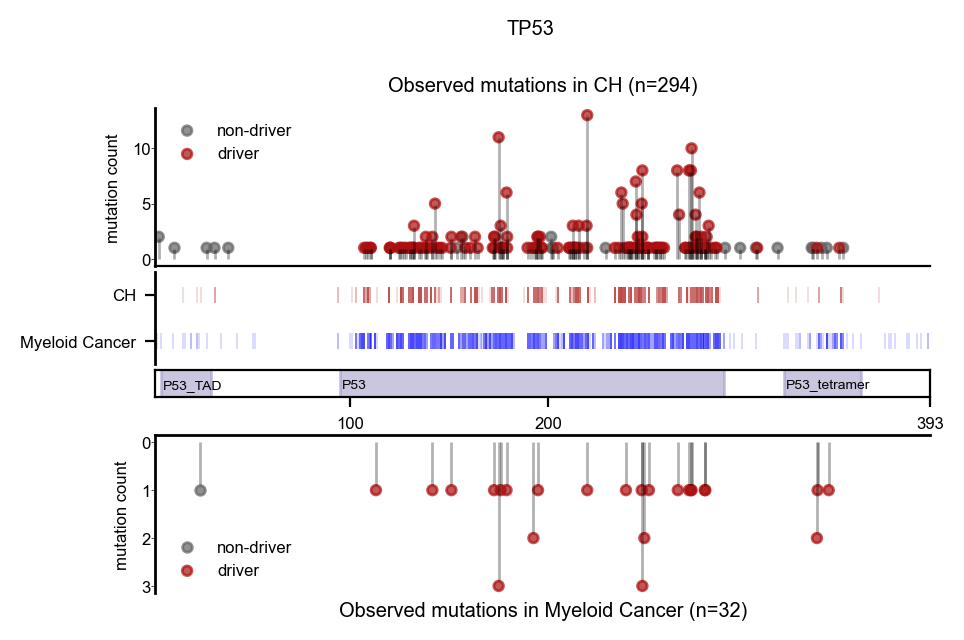

In [19]:
import matplotlib.patches as patches

fn_cancer = conf.output_boostdm_cancer+'prediction/TP53.MYELOID.prediction.tsv.gz'
fn_ch = [x for x in prediction_paths if x.split('/')[-1].split('.')[0] == 'TP53'][0]
CH_mat = pd.read_csv(fn_ch, sep="\t")
cancer_mat = pd.read_csv(fn_cancer, sep="\t")
gene, model = tuple(os.path.basename(fn_ch).split('.')[:2])
df_ch = create_observed_dataset(fn_ch, gene, model, obs_muts)
args_ch = get_plot_data_joanen(df_ch)
gene, cancer_type = tuple(os.path.basename(fn_cancer).split('.')[:2])
df_cancer = create_observed_dataset_cancer(fn_cancer, gene, cancer_type, obs_muts_cancer)
args_cancer = get_plot_data_joanen(df_cancer)
plot_observed_distribution_figure_3_simple(gene, CH_mat, cancer_mat, cancer_type, *args_ch, *args_cancer)

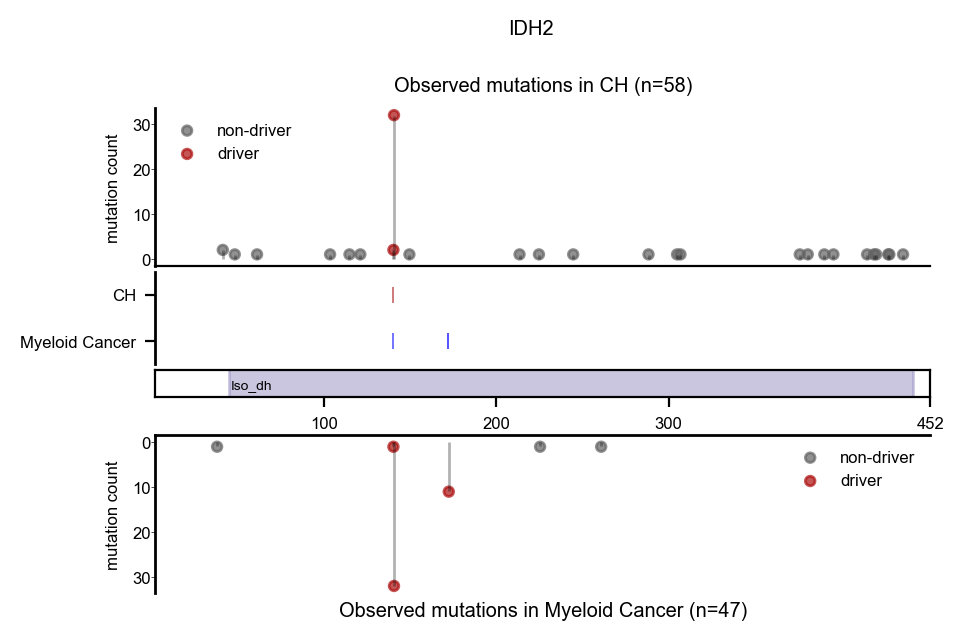

In [20]:
import matplotlib.patches as patches

fn_cancer = conf.output_boostdm_cancer+'prediction/IDH2.MYELOID.prediction.tsv.gz'
fn_ch = [x for x in prediction_paths if x.split('/')[-1].split('.')[0] == 'IDH2'][0]

CH_mat = pd.read_csv(fn_ch, sep="\t")
cancer_mat = pd.read_csv(fn_cancer, sep="\t")
gene, model = tuple(os.path.basename(fn_ch).split('.')[:2])
df_ch = create_observed_dataset(fn_ch, gene, model, obs_muts)
args_ch = get_plot_data_joanen(df_ch)
gene, cancer_type = tuple(os.path.basename(fn_cancer).split('.')[:2])
df_cancer = create_observed_dataset_cancer(fn_cancer, gene, cancer_type, obs_muts_cancer)
args_cancer = get_plot_data_joanen(df_cancer)
plot_observed_distribution_figure_3_simple(gene, CH_mat, cancer_mat, cancer_type, *args_ch, *args_cancer)

# 2. Supplemental Figure S7

In [22]:
genes_w_models = ['DNMT3A', 'TP53', 'IDH2']

In [28]:
def cancer_models_comparison(gene):
    
    # Set the matrixes
    path_saturation = [x for x in prediction_paths if x.split('/')[-1].split('.')[0].startswith(gene)][0]
    cancer_path = [x for x in prediction_paths_cancer if x.split('/')[-1].split('.')[0].startswith(gene)][0]

    CH_mat = pd.read_csv(path_saturation, sep="\t")
    CH_mat['ID2'] = CH_mat['chr'].astype(str)+'-'+CH_mat['pos'].astype(str)+'-'+ CH_mat['alt'].astype(str)
    CH_mat = CH_mat.rename(columns={'HotMaps_cat_1': 'HotMaps', 'CLUSTL_cat_1': 'CLUSTL', 'smRegions_cat_1': 'smRegions'})
    CH_mat['HotMaps'] = CH_mat['HotMaps'].replace(1,2)
    CH_mat['CLUSTL'] = CH_mat['CLUSTL'].replace(1,2)
    CH_mat['smRegions'] = CH_mat['smRegions'].replace(1,2)

    cancer_mat = pd.read_csv(cancer_path, sep="\t")
    cancer_mat['ID2'] = cancer_mat['chr'].astype(str)+'-'+cancer_mat['pos'].astype(str)+'-'+ cancer_mat['alt'].astype(str)
    cancer_mat = cancer_mat[cancer_mat['ID2'].isin(CH_mat['ID2'].tolist())]
    cancer_name = cancer_path.split('/')[-1].split('.')[1]
    # The load saturation function transfrom the matrix, it selects the shapply from the selected variables
    #shap corrected = only if its 1 it returns the shaply value, otherwise it returns 0
    #per aminoacid it returns the maximum shap value
    df_CH = load_saturation_CH(CH_mat, gene, shap_corrected=False)
    df_cancer = load_saturation_cancer(cancer_mat, gene, shap_corrected=False)
    tracked_blueprint(gene, 'CH', CH_mat, cancer_mat, df_CH, df_cancer, cancer_name, show=True)

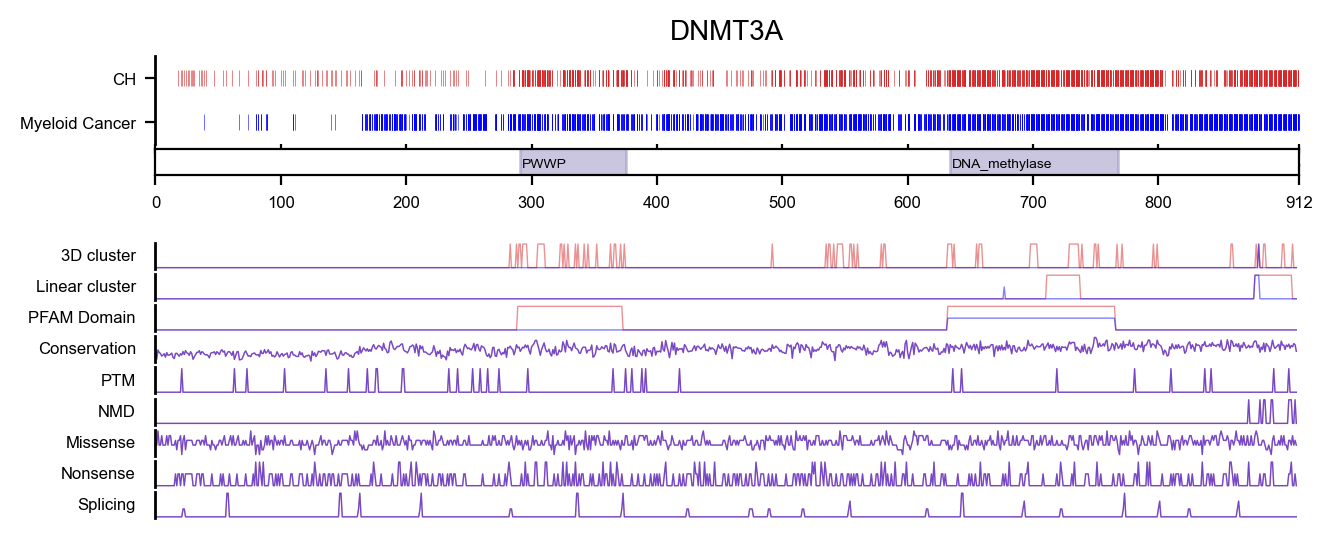

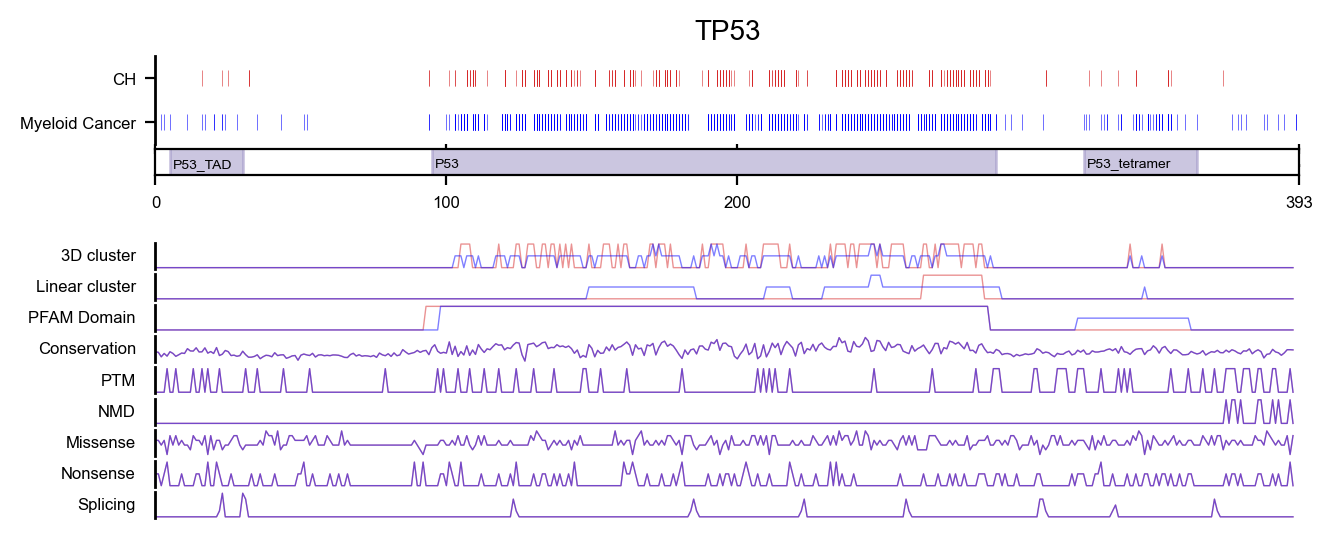

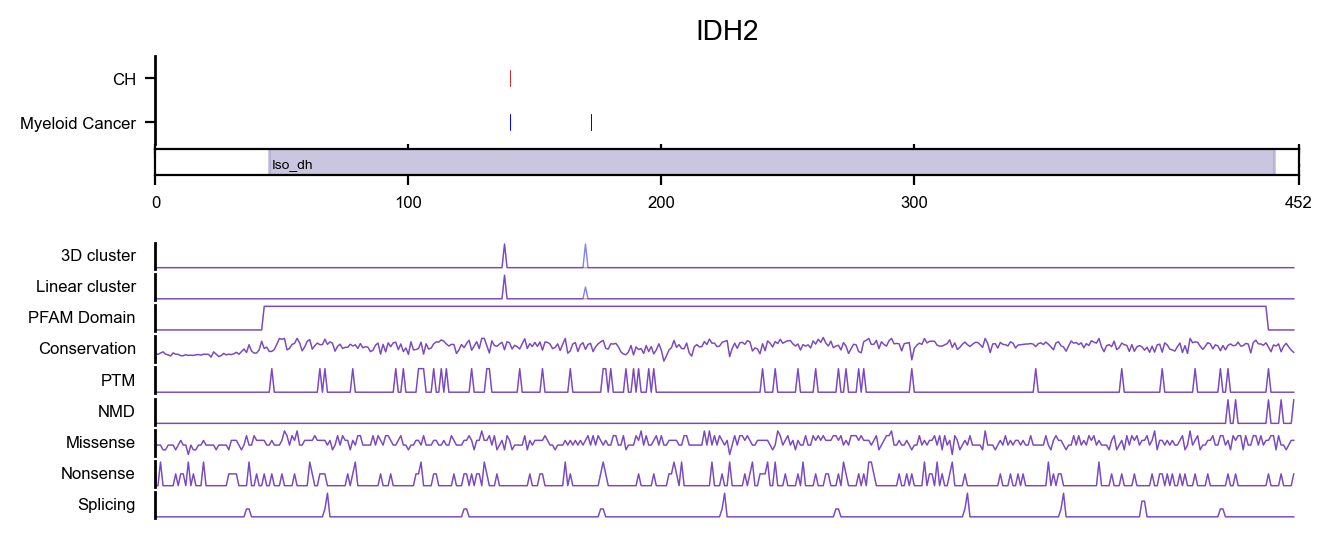

In [29]:
for genes in genes_w_models:
    cancer_models_comparison(genes)

## Shap values comparison

In [35]:
def plot_SHAP_cancer_mixplot(gene):
    
    # Upload boostDM-CH predictions
    muts_satmut_CH = pd.read_csv('../../Paper_data/BoostDM-CH/prediction/' + gene + '.CH.prediction.tsv.gz', sep="\t")
    muts_satmut_CH = muts_satmut_CH[muts_satmut_CH['boostDM_class']==True]

    muts_satmut_CH = muts_satmut_CH[conf.features]
    muts_satmut_CH['shap_CLUSTL_int'] = muts_satmut_CH['shap_CLUSTL_SCORE']+muts_satmut_CH['shap_CLUSTL_cat_1']
    muts_satmut_CH['shap_PTM_int'] = muts_satmut_CH['shap_Acetylation']+muts_satmut_CH['shap_Phosphorylation']+\
                                muts_satmut_CH['shap_Regulatory_Site']+muts_satmut_CH['shap_Ubiquitination']+\
                                muts_satmut_CH['shap_Methylation']
    features = ['shap_HotMaps_cat_1', 'shap_CLUSTL_int', 'shap_smRegions_cat_1', 'shap_PhyloP',
                'shap_PTM_int', 'shap_nmd',  'shap_csqn_type_missense',
                'shap_csqn_type_nonsense', 'shap_csqn_type_splicing']

    values_CH = []
    for x in features:
        for i in muts_satmut_CH[x]:
            values_CH.append([x, i, 'CH'])
    
    # Upload boostDM-cancer predictions
    muts_satmut_cancer = pd.read_csv('../../Paper_data/BoostDM-cancer/prediction/'+ gene + '.MYELOID.prediction.tsv.gz', sep="\t")
    muts_satmut_cancer = muts_satmut_cancer[muts_satmut_cancer['boostDM_class']==True]
#             muts_satmut_cancer = muts_satmut_cancer[features_cancer]
    muts_satmut_cancer = muts_satmut_cancer.rename(columns={'shap_CLUSTL': 'shap_CLUSTL_int',
                                       'shap_HotMaps': 'shap_HotMaps_cat_1',
                                       'shap_smRegions': 'shap_smRegions_cat_1'})
    muts_satmut_cancer['shap_PTM_int'] = muts_satmut_cancer['shap_Acetylation']+muts_satmut_cancer['shap_Phosphorylation']+\
                            muts_satmut_cancer['shap_Regulatory_Site']+muts_satmut_cancer['shap_Ubiquitination']+\
                            muts_satmut_cancer['shap_Methylation']
    for x in features:
        for j in muts_satmut_cancer[x]:
            values_CH.append([x, j, 'MYELOID'])
            
    values_CH = pd.DataFrame(values_CH, columns = ['Feature', 'SHAP_value', 'Cohort'])
    values_CH
    
    # libraries & dataset
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Grouped violinplot
    plt.figure(figsize=(3,4))
    ax = sns.violinplot(x='SHAP_value', y='Feature', hue='Cohort', data=values_CH,
                        palette=['tab:red', '#0000ff'], width=0.7, linewidth=0.3, orient='h',
                        scale='count', scale_hue=True)
    # plt.set_xticklabels([Dict_names_features[x] for x in features], rotation=90)
    ax.set_yticklabels([])
    ax.set_ylabel('')
    plt.axvline(x = 0, color='k', linewidth=0.5)
    plt.xlabel('SHAP values', fontsize=15)
    ax.get_legend().remove()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     plt.xticks(rotation=90)
    plt.show()  

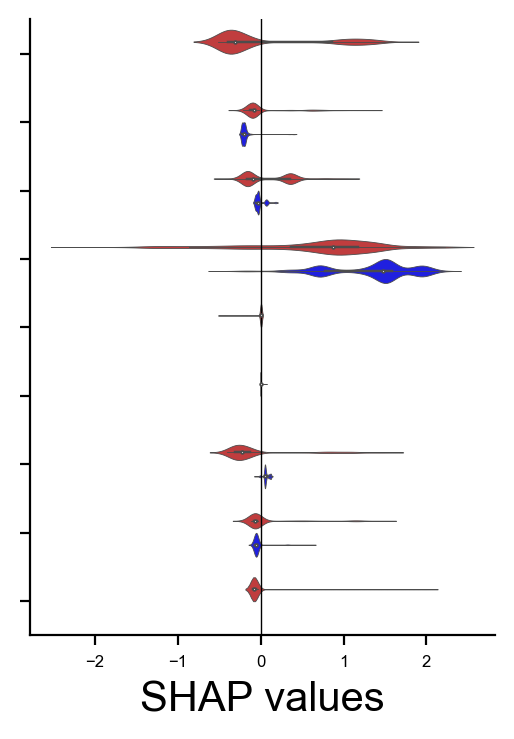

In [36]:
plot_SHAP_cancer_mixplot('DNMT3A')

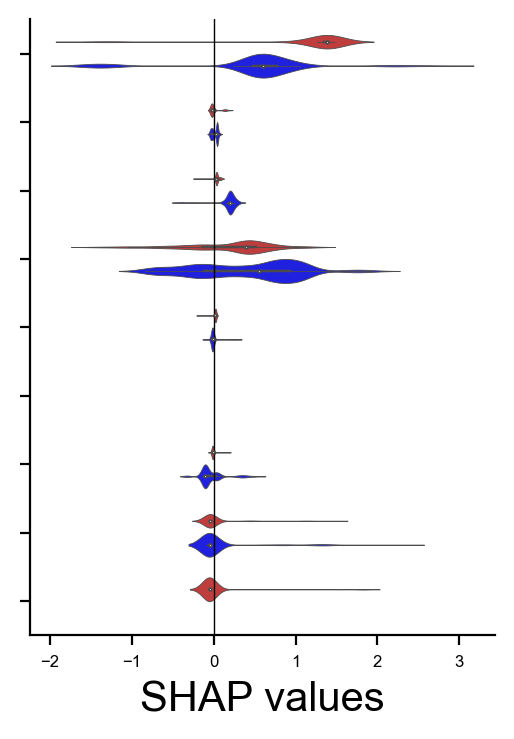

In [38]:
plot_SHAP_cancer_mixplot('TP53')

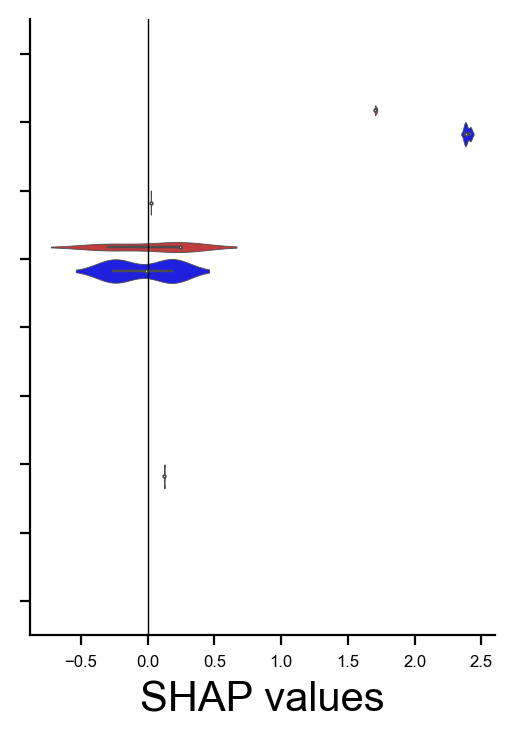

In [39]:
plot_SHAP_cancer_mixplot('IDH2')